### Часть 2.  Cвязь ДВПФ и ДПФ, интерполяция добавлением нулевых отсчетов


Базовый пример.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal

In [2]:
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')

In [3]:
def plot_dtft(x, N, times = 1):
    plt.figure(figsize=[6, 4])
    M=2048
    plt.plot(np.arange(M)/M, abs(np.fft.fft(x, M)), 'g')

    # Zero Padding
    Nz = N * times
    x=np.hstack((x, np.zeros(Nz)))

    ## DFT part 
    N=x.size
    plt.stem(np.arange(N)/N, abs(np.fft.fft(x, N)), 
         'b', 'bo', use_line_collection=True)
    plt.xlim([-0.02, 1+0.02])
    plt.grid()

    plt.title(u'ДПФ и ДВПФ для $x(k)$')
    plt.xlabel(u'$\\nu$')
    plt.ylabel(u'$|X(\\nu)|, |X[n]|$')
    plt.show()

## №1
Рассмотрите $N$-точечную последовательность $x(k)=\sum_{m=0}^{N-1}\mathbf1\left(k-m\right)$ (последовательность $N$ единичных импульсов).
Вычислите ее ДВПФ. Принять $\Delta t = 1$. Определите модуль ДВПФ $\left|X(\nu)\right|$.

Определите N-точечное ДПФ без нормирующего множителя $1/N$ для последовательности $x(k)$ с помощью формулы ДПФ.


Убедитесь, что в таком случае значение ДВПФ в каждой точке $\nu=n/N$ соответствует отсчету ДПФ с номером n.

Поведите моделирование на Python. Добавьте к последовательности такое количество нулей, чтобы значительно улучшить качество визуализации ДВПФ последовательности. Приведите графическую интерпретацию результата.


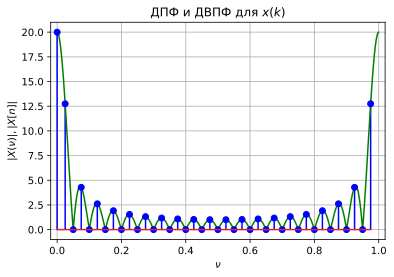

In [4]:
N=20
x=np.ones(N)
k=np.arange(N)


# Window 
window = signal.boxcar(x.size)
x=x*window


## DTFT part 
plot_dtft(x, N)

## №2

Проделайте аналогичные действия для $N$-точечной последовательности $$z(k)=\cos\left(\frac{2\pi k}5\right).$$

Как изменяться ДВПФ спектр последовательности с увеличением числа точек $N$? 

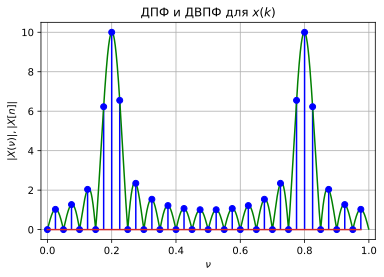

In [5]:
N = 20
k = np.arange(N)
x = np.cos(2. * np.pi * k / 5)

# Window 
window = signal.boxcar(x.size)
x=x*window


## DTFT part 
plot_dtft(x, N)

## №3
Рассмотрите две последовательности, каждая из которых состоит из двух косинусоид с разными относительными частотами: 
$$x_1(k)=\cos\left(\frac{\pi k}{4}\right)+\cos\left(\frac{17\pi k}{64}\right) =
\cos\left(2\pi k \frac{8}{64}\right)+\cos\left(2\pi k \frac{8.5}{64}\right)
$$
$$x_2(k)=\cos\left(\frac{\pi k}{4}\right)+\cos\left(\frac{21\pi k}{64}\right) =
\cos\left(2\pi k \frac{8}{64}\right)+\cos\left(2\pi k \frac{10.5}{64}\right)
$$
Предположим, что делается оценка спектра с помощью N=64 точечного ДПФ. Укажите, в каком случае спектральные компоненты будут различимы, а в каком нет. Приведите обоснование результата. 

Реализуйте вычисления в Python, приведите также результат после интерполяции нулевыми отсчетами.  

Повторите вычисления для N=128. Как размер прямоугольного временного окна влияет на результат? 

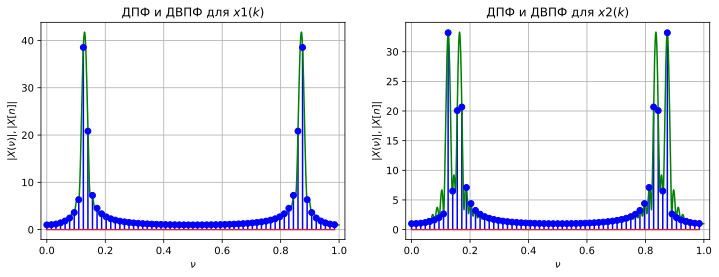

In [6]:
N = 64
k = np.arange(N)
x1 = np.cos(np.pi * k / 4) + np.cos(17. * np.pi * k / 64)
x2 = np.cos(np.pi * k / 4) + np.cos(21. * np.pi * k / 64)

# Window 
window = signal.boxcar(N)
x1 = x1 * window
x2 = x2 * window

## DTFT part 
plt.figure(figsize=[12, 4])

# Zero Padding
# also we can use np.fft.fft(x, N+Nz)
Nz = N
x1 = np.hstack((x1, np.zeros(Nz)))
x2 = np.hstack((x2, np.zeros(Nz)))
M = 2048

def print_plot(x, y, z, coord, data_str):
    plt.subplot(x, y, z)
    plt.plot(np.arange(M)/M, abs(np.fft.fft(coord, M)), 'g');
    plt.stem(np.arange(N)/N, abs(np.fft.fft(coord, N)), 
             'b', 'bo', use_line_collection=True)
    plt.xlim([-0.02, 1+0.02])
    plt.grid()

    plt.title(data_str)
    plt.xlabel(u'$\\nu$')
    plt.ylabel(u'$|X(\\nu)|, |X[n]|$')
    return

print_plot(1, 2, 1, x1, 'ДПФ и ДВПФ для $x1(k)$')
print_plot(1, 2, 2, x2, 'ДПФ и ДВПФ для $x2(k)$')

plt.show()

## №4

**Теоретическая часть**

Определить ДВПФ для следующих окон для ДПФ:

* прямоугольное 
$$
w_1=\left\{\begin{array}{l}
1, \; 0 \leq k < N,
\\
0, \{k<0\} \cup \{k\geq 0\};
\end{array}\right.
$$
* треугольное (окно Бартлетта) 
$$
w_2=\left\{\begin{array}{l}
1-\dfrac{2|k-N/2|}{N}, \; 0 \leq k < N,
\\
0, \{k<0\} \cup \{k\geq 0\};
\end{array}\right.
$$
*  Ханна
$$
w_3=\left\{\begin{array}{l}
\dfrac{1}{2} (1-\cos\dfrac{2\pi k}{N}), \; 0 \leq k < N,
\\
0, \{k<0\} \cup \{k\geq 0\};
\end{array}\right.
$$

Определить ширину главного лепестка на нулевом уровне для каждого из окон.
Выразить через ДВПФ спектр оконной функции ДВПФ для последовательности $x(k)=\cos(\dfrac{\pi k}{4})+\cos(\dfrac{21 \pi k}{64})$, взвешанной окном $w(k)$ (произвольным из $w_1(k)$, $w_2(k)$, $w_3(k)$), $N=64$.

**Практическая часть**

Вывести график ДВПФ при $-0.5 \leq \nu\leq 0.5$ для последовательностей $x(k)w_1(k)$, $x(k)w_2(k)$ и $x(k)w_3(k)$. Объяснить различия между графиками. На всех ли графиках спектральные компонеты различимы?

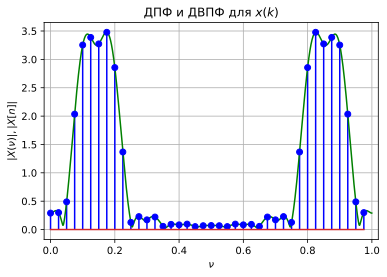

In [7]:
N = 20
k = np.arange(N)
x = np.cos(np.pi * k / 4) + np.cos(21 * np.pi * k / 64)
# Window 
window = signal.bartlett(x.size)
x = x * window
plot_dtft(x, N)

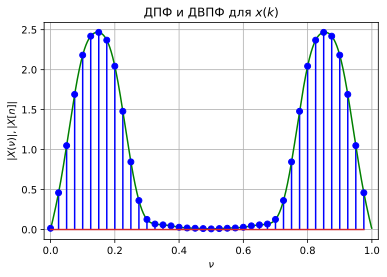

In [8]:
window = signal.hann(x.size)
x = x * window
plot_dtft(x, N)

##  №5*

Имеется аудиозапись сигнала от камертона tuning-fork.wav. Нужно определить по записи эталонную частоту камертона. 
*  Как влияет на результат анализа выбор оконной функции и длина записи?
*  Чему равна частота дискретизаии для этой записи?

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile
from scipy import signal


fs, x=scipy.io.wavfile.read('./tuning-fork.wav')
q2=pow(2, 11)
time_delay=2000
x=x[time_delay:(time_delay+q2)]

print(u'Частота дискретизации f_s', fs, 'Гц')
M=q2*3;
plt.figure(figsize=[6, 4])

window = signal.hann(q2)

x=x*window

plt.subplot(2,1,1)
plt.plot((-0.5+(np.arange(M)/M))*fs, 
         abs(np.fft.fftshift(np.fft.fft(x, M)))/M, 
         'g'); 
plt.axis(xmin=400, xmax=fs/50, ymin=0)

def title_change(title, size, xl, yl):
    plt.title(title % size)
    plt.xlabel(xl)
    plt.ylabel(yl)
    plt.grid()
    return

title_change('DTFT of $x(k)$, $\Delta f=%.3f $', fs / M, '$f$, Hz', u'$|X(\\nu)|$')
title_change('Signal $x(k)$, N=%i', x.size, '$k$', '$x(k)$')

plt.subplot(2,1,2)
plt.plot(np.arange(x.size), x)

plt.tight_layout()

FileNotFoundError: [Errno 2] No such file or directory: './tuning-fork.wav'